In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
from math import ceil
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

random_state = 42
score_types=["silhouette", "calinski_harabasz", "davies_bouldin"]


In [17]:
df_cluster = pd.read_parquet(path="./../data/clean_data/category_seasonal_data.parquet")
df_cluster

,comdate_diff,price,freight_value,days_since_year_start_commercial,days_since_month_start_commercial,year_commercial,month_commercial,day_of_month_commercial,day_of_week_commercial,days_since_year_start_purchase,days_since_month_start_purchase,year_purchase,month_purchase,day_of_month_purchase,day_of_week_purchase,commercial_date_coded,time_window_order_coded,filtered_category_coded
0,2,124.99,21.88,133,13,2017,5,14,6,135,15,2017,5,16,1,3,1,10
1,11,289.00,46.48,0,0,2018,1,1,0,11,11,2018,1,12,4,7,1,14
2,6,139.94,17.79,132,12,2018,5,13,6,138,18,2018,5,19,5,3,1,10
3,5,149.94,23.36,66,7,2018,3,8,3,71,12,2018,3,13,1,1,1,10
4,-14,230.00,22.25,223,11,2018,8,12,6,209,28,2018,7,29,6,5,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115013,6,74.90,13.88,90,0,2018,4,1,6,96,6,2018,4,7,5,8,1,10
115014,3,114.90,14.16,90,0,2018,4,1,6,93,3,2018,4,4,2,8,1,6
115015,7,37.00,19.04,90,0,2018,4,1,6,97,7,2018,4,8,6,8,1,2
115016,-21,689.00,22.07,327,23,2017,11,24,4,306,2,2017,11,3,4,0,0,12


## Definindo funções

In [18]:
def df_cluster_scores(df_cluster : pd.DataFrame, initial_range : int, final_range : int, random:int=42, 
    score_types:list=["silhouette"], width_per_ax : int=5, height_per_ax : int=5): 
    
    km = KMeans(random_state=random)
    visualizer = KElbowVisualizer(km, k=(initial_range, final_range))
    visualizer.fit(df_cluster)
    visualizer.show()

    fitted_kmeans = {}
    labels_kmeans = {}
    df_scores = []
    for n_clusters in np.arange(initial_range, final_range):
        tmp_scores = {}
        tmp_scores["n_clusters"] = n_clusters
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=random)
        labels_clusters = kmeans.fit_predict(df_cluster)
        
        fitted_kmeans[n_clusters] = kmeans
        labels_kmeans[n_clusters] = labels_clusters
        
        if "silhouette" in score_types:
            silhouette = silhouette_score(df_cluster, labels_clusters)
            tmp_scores["silhouette"] = silhouette
        
        if "calinski_harabasz" in score_types:
            ch = calinski_harabasz_score(df_cluster, labels_clusters)
            tmp_scores["calinski_harabasz"] = ch
        
        if "davies_bouldin" in score_types:
            db = davies_bouldin_score(df_cluster, labels_clusters)
            tmp_scores["davies_bouldin"] = db
                    
        df_scores.append(tmp_scores)

    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index("n_clusters", inplace=True)
    df_scores.plot(subplots=True, layout=(1,len(score_types)), figsize=(len(score_types) * width_per_ax, height_per_ax), xticks=np.arange(initial_range, final_range+1))

    return

In [46]:
def multi_visualize_silhoutte(df_cluster : pd.DataFrame, initial_range : int, final_range : int, 
        per_col : int=2, random : int=42, width_per_ax : int=6, height_per_ax : int=5):
    
    final_range += 1
    lines = ceil((final_range-initial_range)/per_col)
    
    fig, axes = plt.subplots(lines, per_col, figsize=(per_col*width_per_ax,lines*height_per_ax))
    for pos, nCluster in enumerate(range(initial_range, final_range)):
        km = KMeans(n_clusters=nCluster, random_state=random)
        
        if lines == 1:
            ax=axes[pos]
        else: 
            q, mod = divmod(pos, per_col)
            ax = axes[q][mod]
        
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
        visualizer.fit(df_cluster)
        ax.set_title(f"clusters = {nCluster}\nscore = {visualizer.silhouette_score_}") 

    return

In [20]:
def visualize_silhoutte(df_cluster : pd.DataFrame, n_cluster : int, random : int=42, width_per_ax : int=6, height_per_ax : int=5):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(width_per_ax, height_per_ax)
    km = KMeans(n_clusters=n_cluster, random_state=random)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
    visualizer.fit(df_cluster)
    ax1.set_title(f"clusters normalizado = {n_cluster}\nscore = {visualizer.silhouette_score_}") 

    return 

## Encontrando a melhor versão do dataframe
### Opções:
    Original
    Normalizado
    Padronizado

### Testando sample de 20000 linhas

In [24]:
df_sample_20 = df_cluster.sample(n=20000, random_state=42)

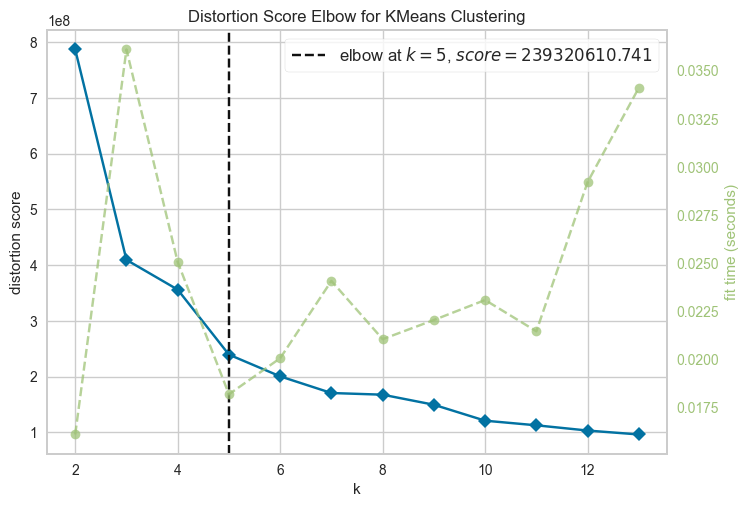

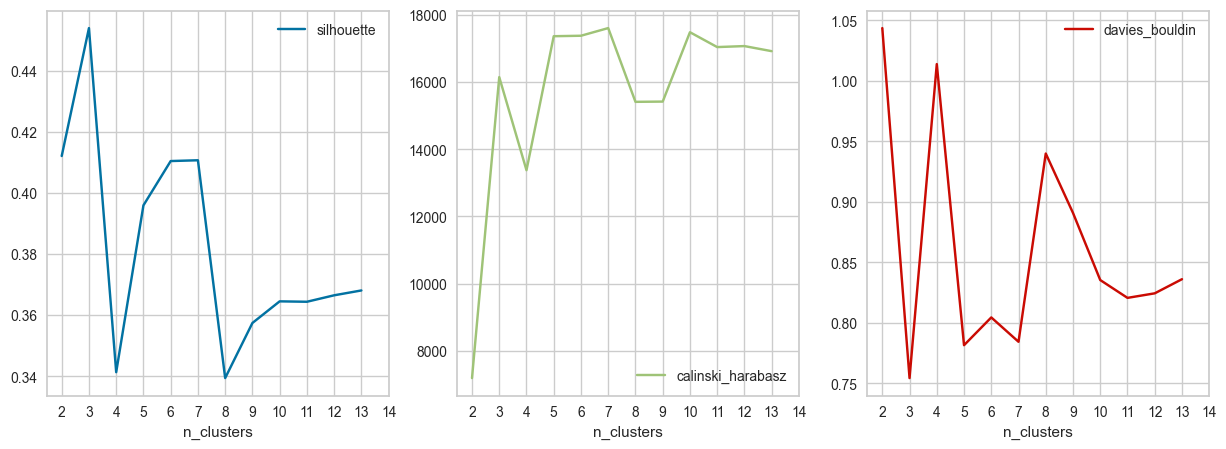

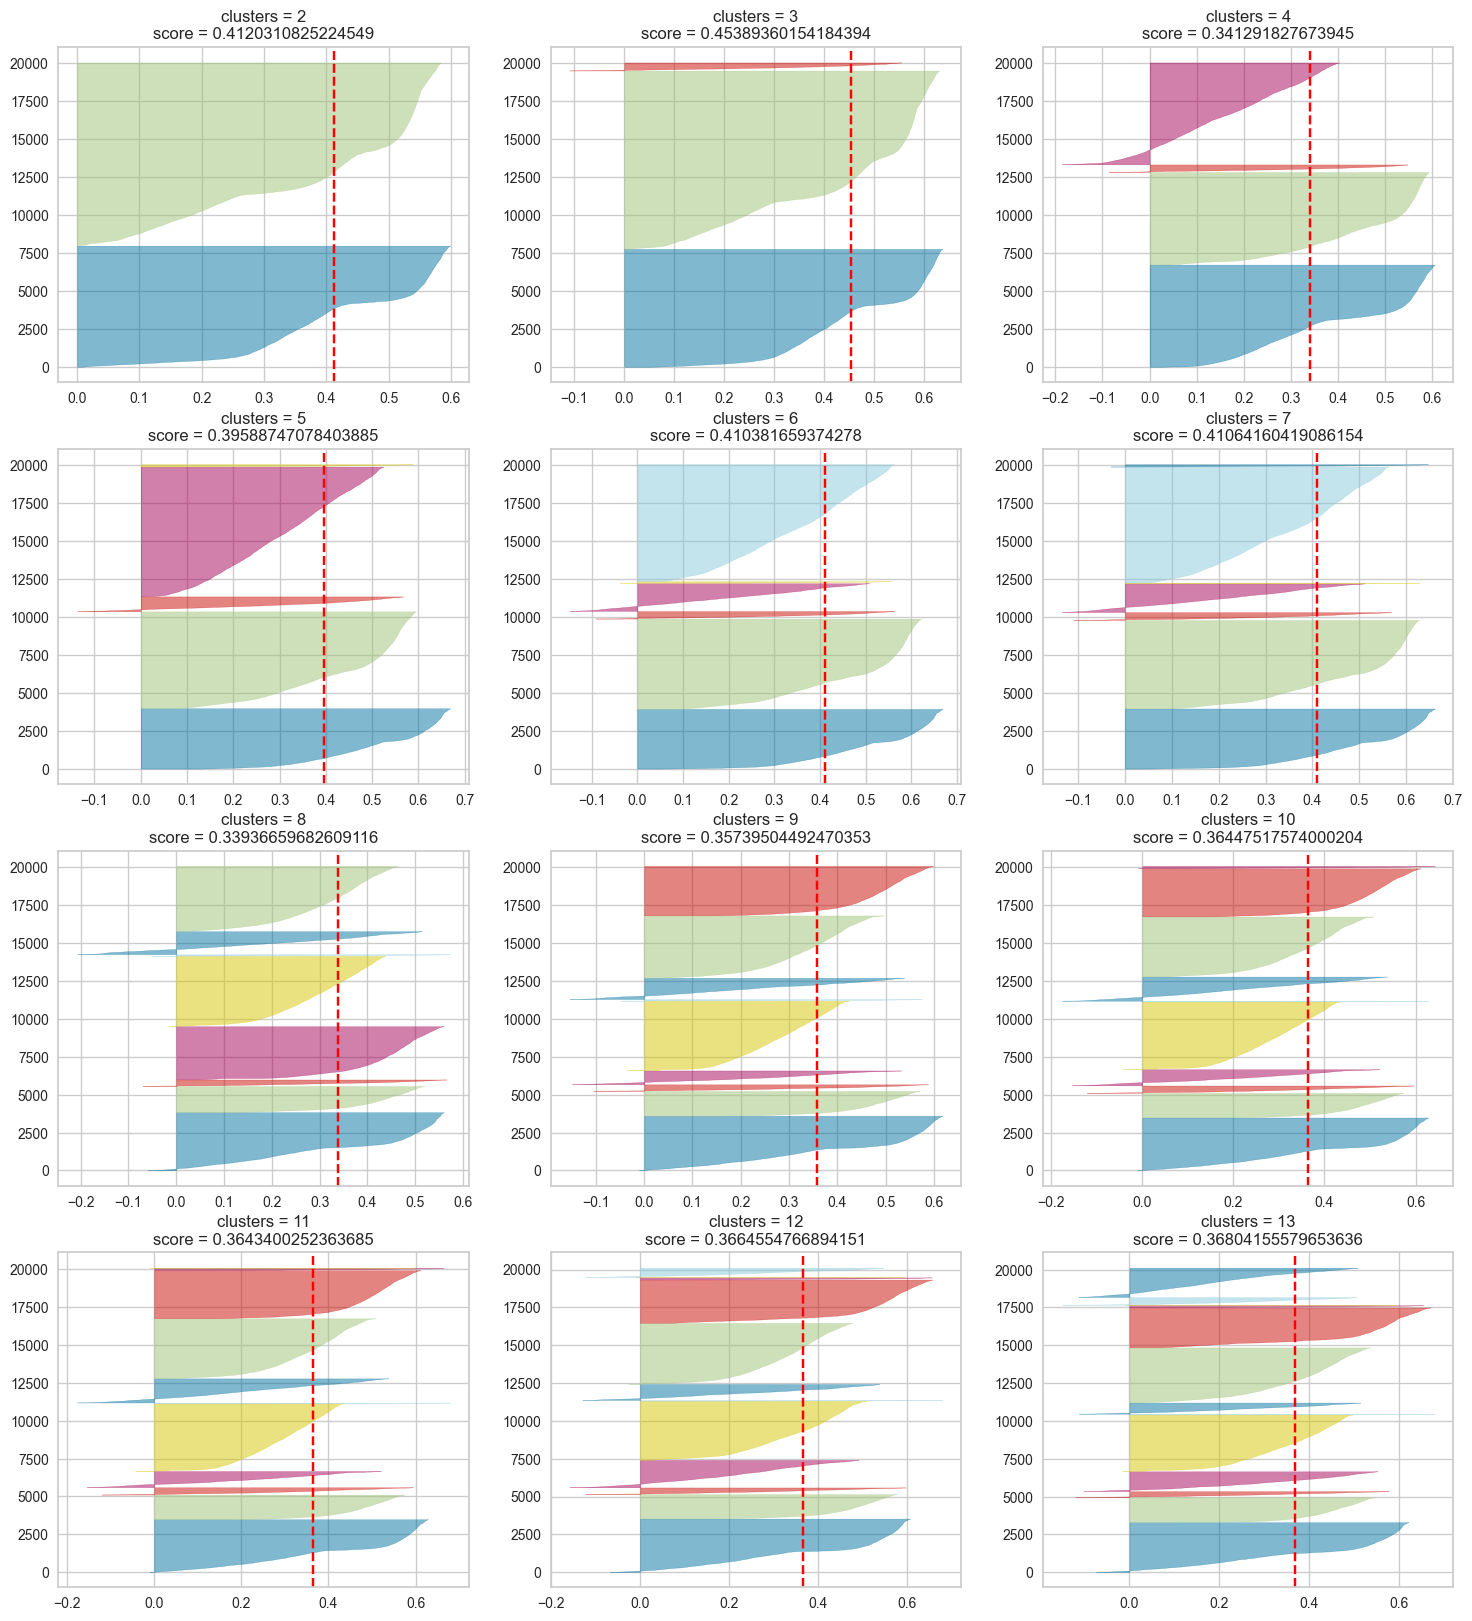

In [48]:
df_cluster_scores(df_sample_20, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20, 2, 13, per_col=3)

In [53]:
visualize_silhoutte(df_sample_20, 2)
visualize_silhoutte(df_sample_20, 5)

### Testando sample de 20000 linhas normalizado

In [31]:
normalizer = MinMaxScaler()
df_sample_20_normalized = normalizer.fit_transform(df_sample_20)

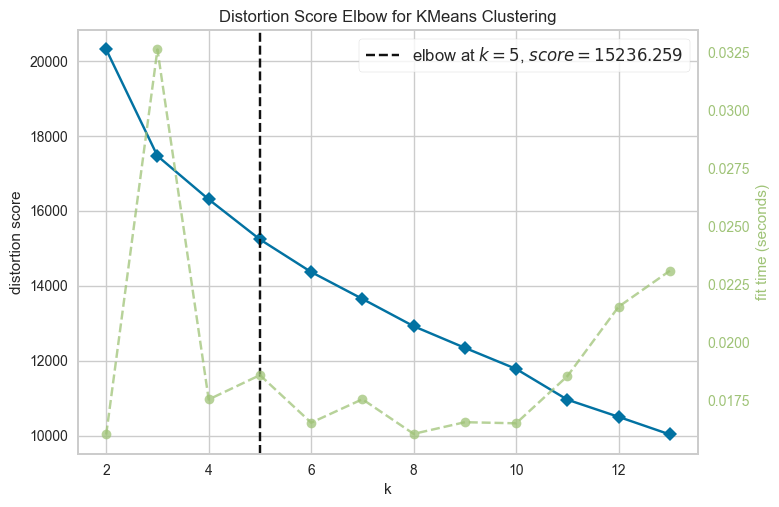

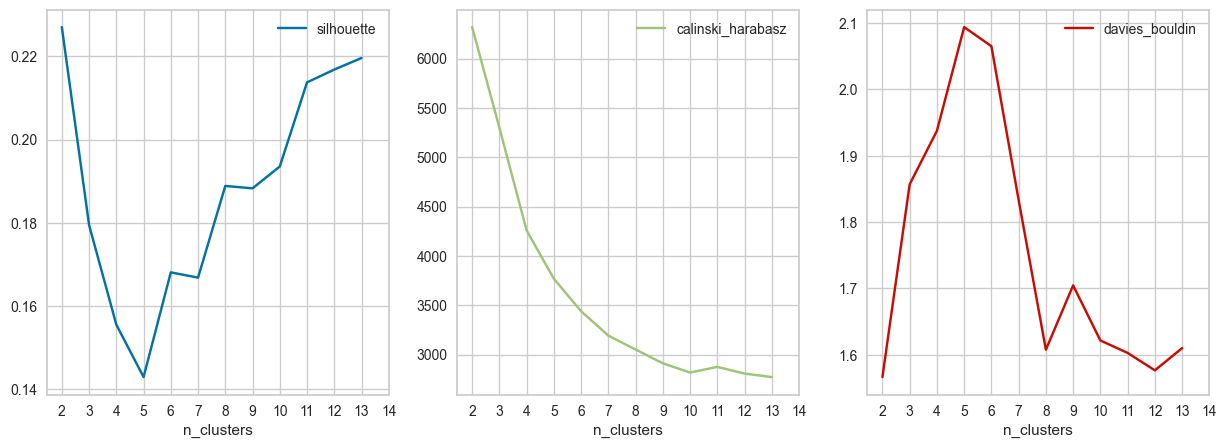

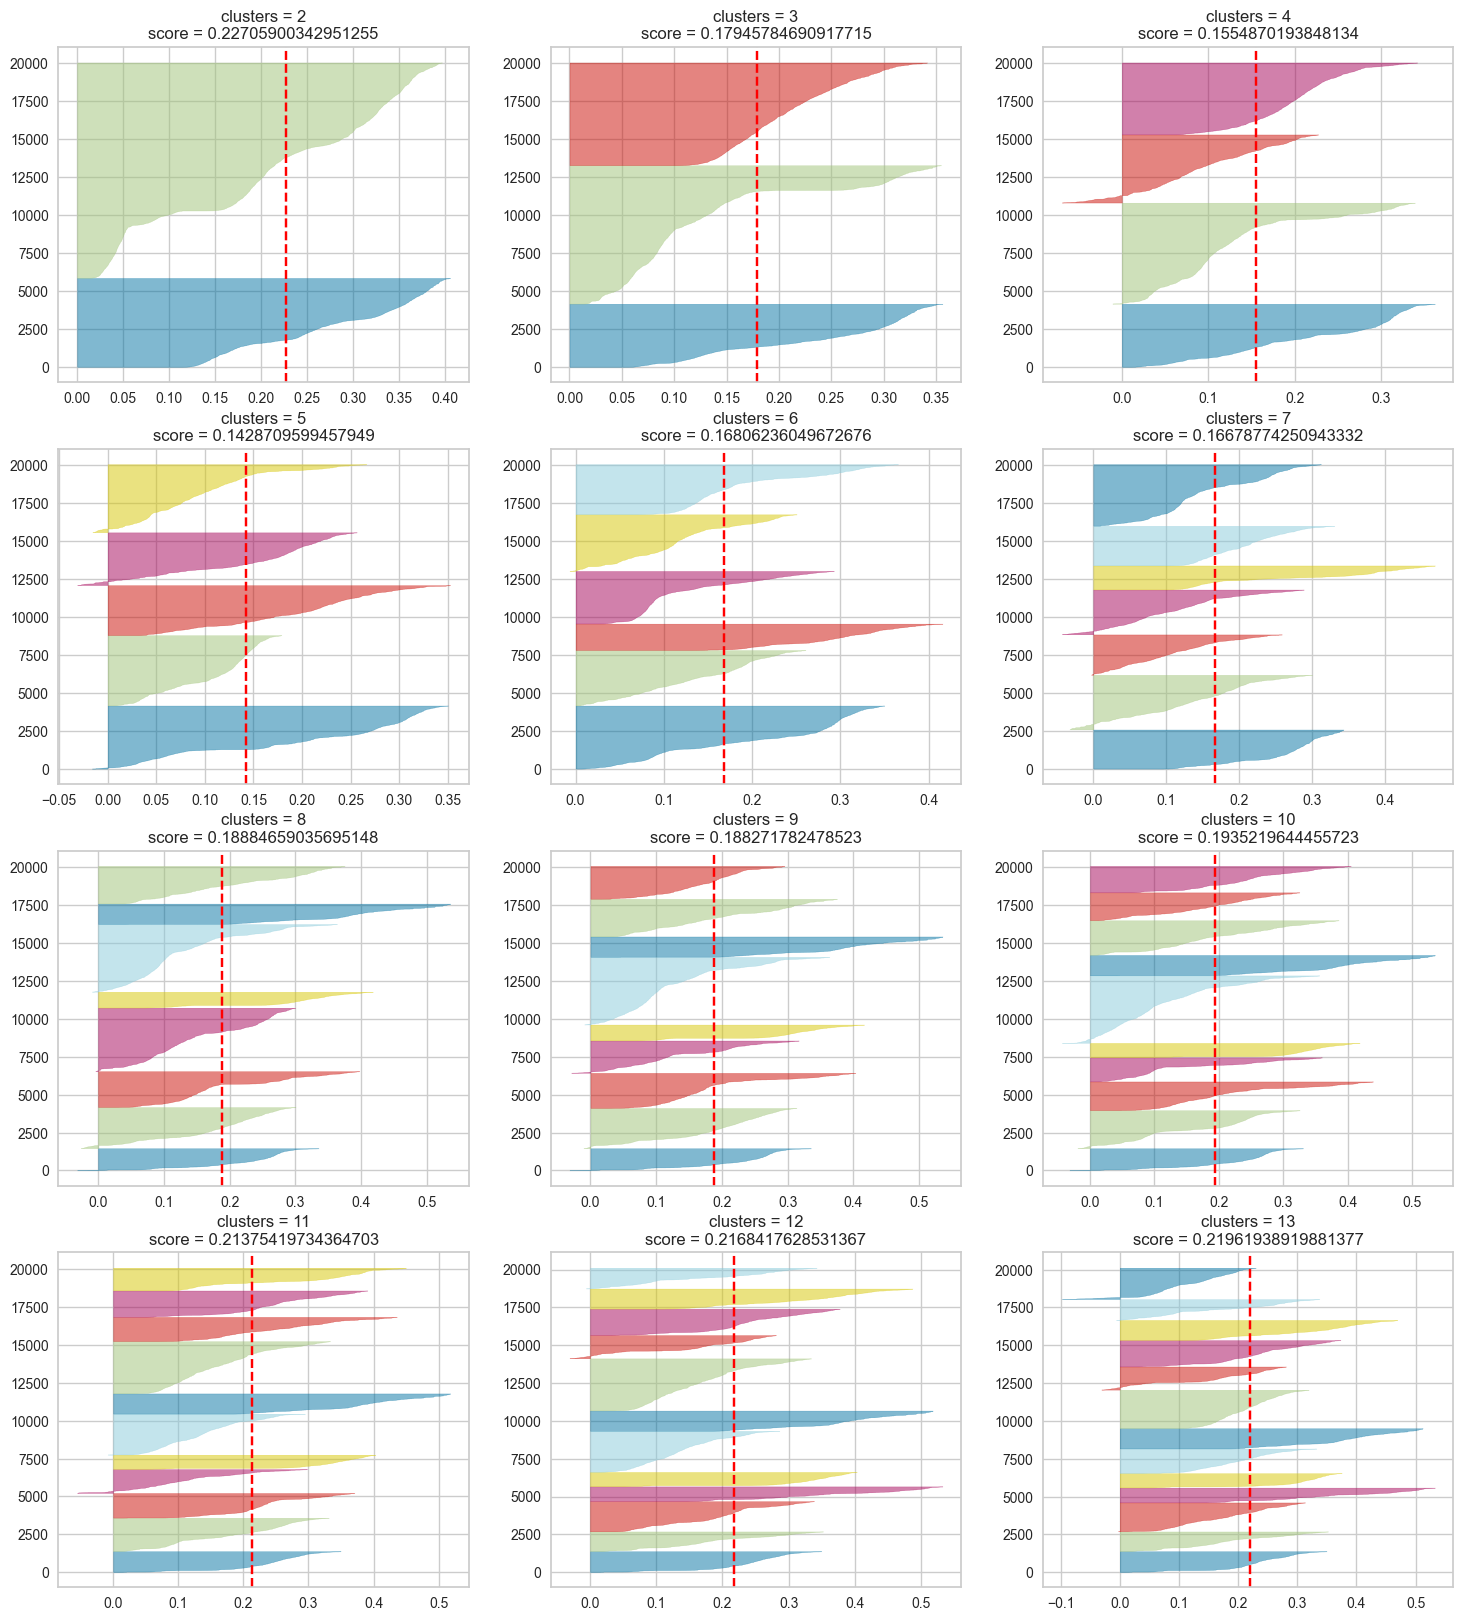

In [49]:
df_cluster_scores(df_sample_20_normalized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_normalized, 2, 13, per_col=3)

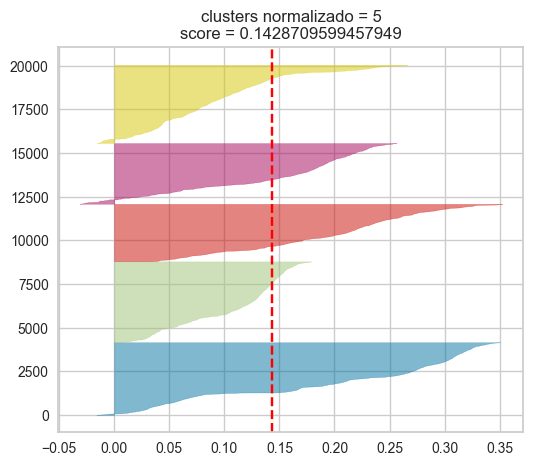

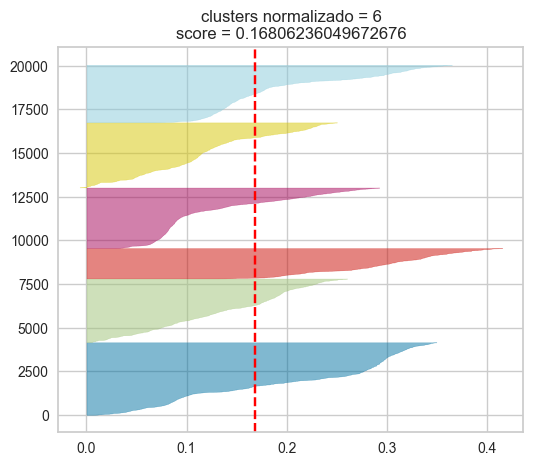

In [52]:
visualize_silhoutte(df_sample_20_normalized, 5)
visualize_silhoutte(df_sample_20_normalized, 6)

### Testando com sample de 10000 linhas padronizado

In [39]:
scaler = StandardScaler()
df_sample_20_standardized = scaler.fit_transform(df_sample_20)

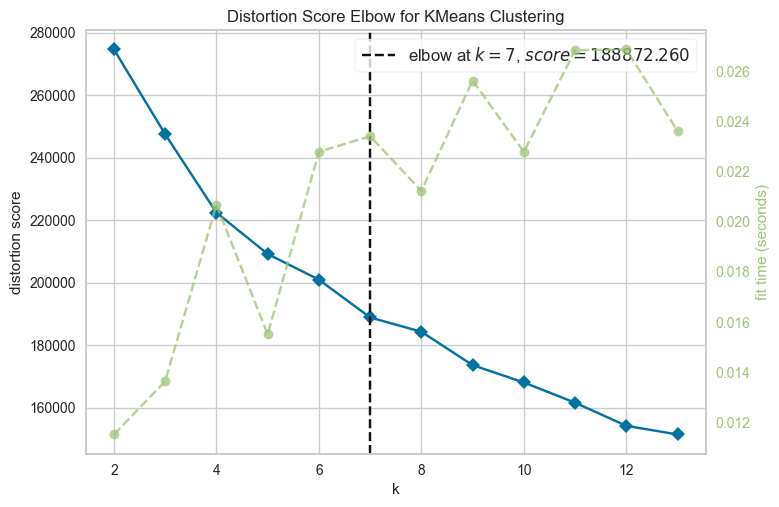

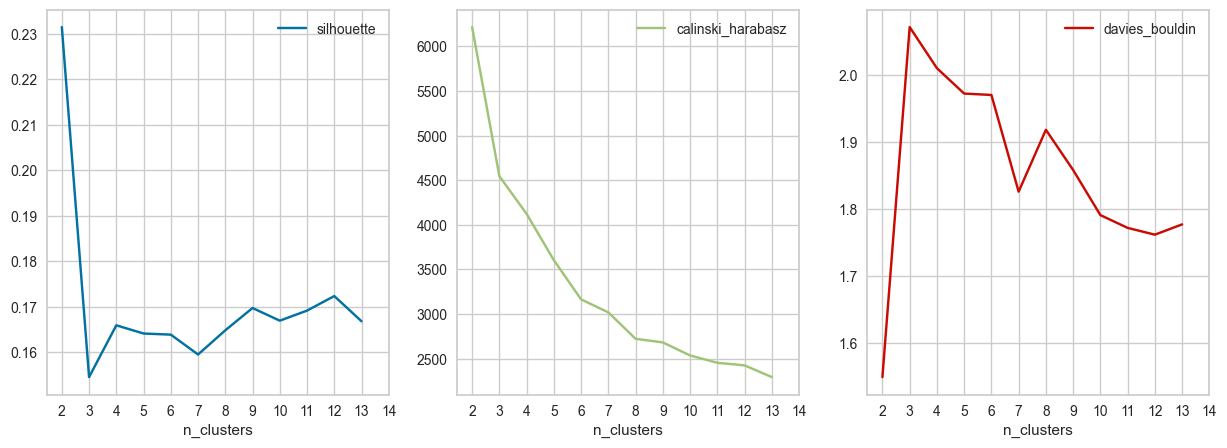

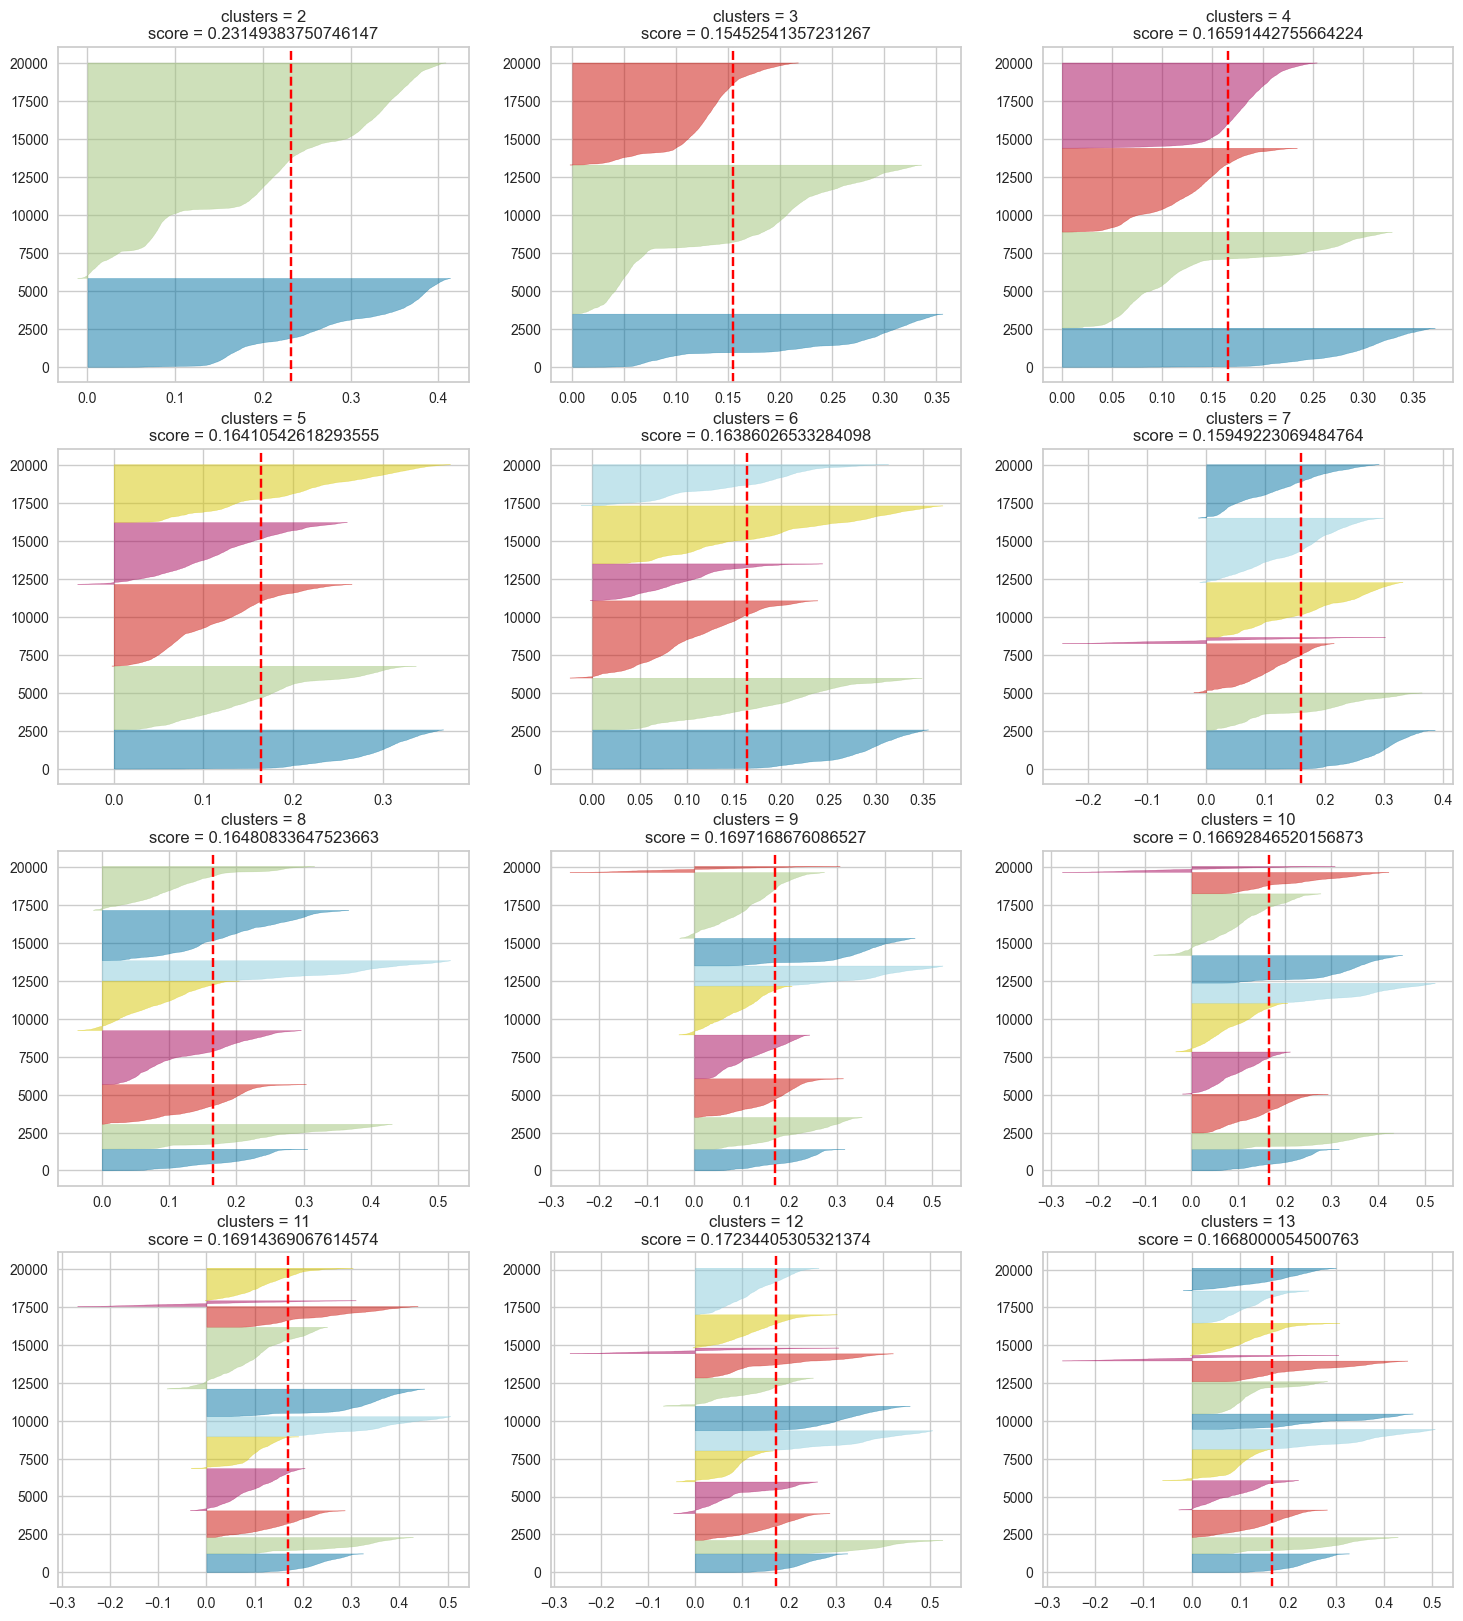

In [50]:
df_cluster_scores(df_sample_20_standardized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_standardized, 2, 13, per_col=3)

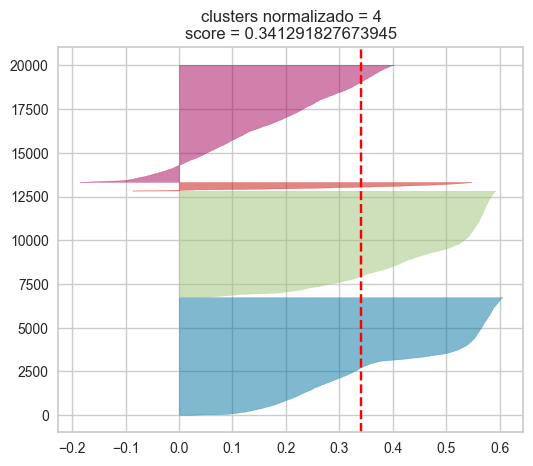

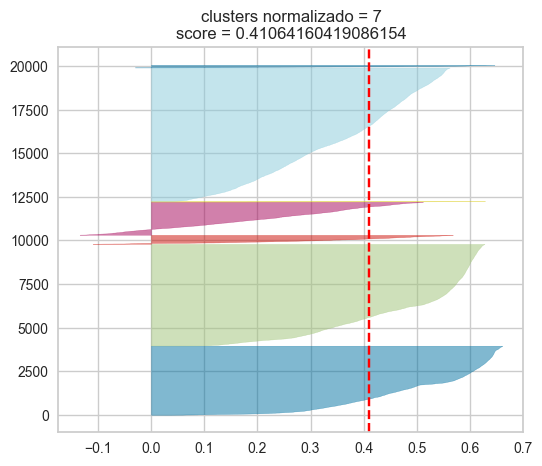

In [51]:
visualize_silhoutte(df_sample_20, 4)
visualize_silhoutte(df_sample_20, 7)

## Seguindo com o dataframe ???

In [ ]:
normalizer = MinMaxScaler()
df_nparray_normalized = normalizer.fit_transform(df_cluster)

df_normalized = pd.DataFrame({f'{df_cluster.columns[i]}': df_nparray_normalized[:,i] for i in range(df_nparray_normalized.shape[1])})
df_normalized

## Realizando PCA

In [ ]:
pca = PCA()
pca.fit(df_normalized)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (8,5))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid(True)
plt.xticks(list(np.arange(1, 21, 1)))
plt.yticks(list(np.arange(50, 101, 5)))
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [ ]:
pca = PCA(n_components = 8)
pca.fit(df_normalized)
pca_customer_products = pca.transform(df_normalized)

## Buscando melhor número de clusters

In [ ]:
# random = 42
# initRange = 2
# endRange = 14
# df_cluster = df_normalized
# # df = df_normalized.sample(10000, random_state=random)

# # grafico de cotovelo
# km = KMeans(random_state=random)
# visualizer = KElbowVisualizer(km, k=(initRange, endRange))
# visualizer.fit(df_cluster)
# visualizer.show()

# # graficos de score. Silhoueta, Calinski Harabasz, Davies Bouldin 
# fitted_kmeans = {}
# labels_kmeans = {}
# df_scores = []
# for n_clusters in np.arange(initRange, endRange):
#     tmp_scores = {}
#     tmp_scores["n_clusters"] = n_clusters
    
#     kmeans = KMeans(n_clusters=n_clusters, random_state=random)
#     labels_clusters = kmeans.fit_predict(df_cluster)
    
#     fitted_kmeans[n_clusters] = kmeans
#     labels_kmeans[n_clusters] = labels_clusters
    
#     silhouette = silhouette_score(df_cluster, labels_clusters)
#     tmp_scores["silhouette_score"] = silhouette
#     ch = calinski_harabasz_score(df_cluster, labels_clusters)
#     tmp_scores["calinski_harabasz_score"] = ch
#     db = davies_bouldin_score(df_cluster, labels_clusters)
#     tmp_scores["davies_bouldin_score"] = db
                
#     df_scores.append(tmp_scores)

# df_scores = pd.DataFrame(df_scores)
# df_scores.set_index("n_clusters", inplace=True)
# df_scores.plot(subplots=True, layout=(1,3), figsize=(15, 5))

# # Grafico de silhoueta com 8 clusters
# nCluster = 8
# fig, (ax1) = plt.subplots(1, 1)
# fig.set_size_inches(10, 5)
# km = KMeans(n_clusters=nCluster, random_state=42)
# visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
# visualizer.fit(df_cluster)
# ax1.set_title(f"clusters normalizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

In [ ]:
## Célula com longo tempo pra executar

# initRange=2
# endRange=14

# fig, ax = plt.subplots(4, 3, figsize=(22,20))
# for nCluster in range(initRange, endRange):
#     km = KMeans(n_clusters=nCluster, random_state=42)
#     q, mod = divmod(nCluster, 3)
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(df_normalized)
#     ax[q-1][mod].set_title(f"clusters normalizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

## Clusterizando

### KMeans
### Utilizando 5

In [ ]:
n_clusters = 5
kmeans_model = KMeans(n_clusters, random_state=42)
clusters = kmeans_model.fit_predict(df_normalized)
df_kmeans = pd.DataFrame(clusters)
df_normalized.insert(df_normalized.shape[1], f'kmeans_{n_clusters}', df_kmeans)
df_normalized

df_cluster["kmeans_5"] = df_normalized["kmeans_5"]
df_cluster

## EDA geral

### EDA para kmeans de 5
### Todas as features

In [ ]:
# Célula com longo tempo pra executar

cluster_colors = ['blue', 'green', 'red', 'purple', 'yellow']
clusters_kmeans = [("kmeans_5", 5)]

for column, clusters in clusters_kmeans:
    for cluster in range(clusters):
        cluster_data = df_cluster[df_cluster[column] == cluster]
        df_clean = df_cluster.drop([i[0] for i in clusters_kmeans], axis=1)

        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(df_clean.columns):
            plt.subplot(5, 4, i + 1)
            sns.histplot(cluster_data[feature], kde=True, color=cluster_colors[cluster])
            plt.title(f'{feature} - Cluster {cluster}')
            plt.xlabel('')
            plt.ylabel('')

        plt.tight_layout()
        plt.show()

    for feature in df_clean.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)

        sns.boxplot(x=column, y=feature, data=df_cluster, palette=cluster_colors[:clusters], hue=column, legend=False, ax=ax1)
        ax1.set_title(f'Boxplot da feature {feature}') 
        sns.violinplot(x=column, y=feature, data=df_cluster, palette=cluster_colors[:clusters], hue=column, legend=False, ax=ax2)
        ax2.set_title(f'Violin Plot da feature {feature}')
        
        plt.show()

## Exportando resultado da clusterização


In [ ]:
# df_cluster.to_parquet("./../data/clean_data/clustered_kmeans_5.parquet")